In [1]:
import numpy
import random
import matplotlib.pyplot

真の分布に従う確率変数

(混合正規分布 $(1-a)N(0,1)+aN(b,1)$ に従う乱数を生成)

In [2]:
def generator(a,b):
    uni_rv=random.random()
    if uni_rv>a:
        return numpy.random.normal(0,1)
    else:
        return numpy.random.normal(b,1)

標準正規分布の密度関数

In [3]:
def normal_gaussian_pdf(x):
    return numpy.exp(-x**2/2)/(2*numpy.pi)**0.5

確率モデル

In [4]:
def model(x,a,b):
    return (1-a)*normal_gaussian_pdf(x)+a*normal_gaussian_pdf(x-b)

サンプル数Nと真のパラメータ$a_0$, $b_0$を与えると事後分布の様子を描画

In [5]:
def plot_posterior(a0,b0,N):
    sample = [generator(a0,b0) for _ in range(N)]
    a_range, b_range = numpy.meshgrid(numpy.linspace(0,1,100), numpy.linspace(-5,5,100))
    c_range = numpy.exp(sum([numpy.log(model(x,a_range,b_range)) for x in sample]))
    matplotlib.pyplot.contour(a_range, b_range, c_range,100)
    matplotlib.pyplot.show()

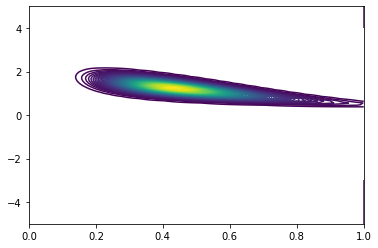

In [6]:
plot_posterior(0.4,1,100)

In [11]:
def show_graph(N,a0,b0,mesh=100,cmap='viridis'):
    sample=[generator(a0,b0) for _ in range(N)]
    a_range, b_range = numpy.meshgrid(numpy.linspace(0,1,100), numpy.linspace(b0-2,b0+2,100))
    c_range = numpy.exp(sum([numpy.log(p(x,a_range,b_range)) for x in sample]))
    fig, ax = matplotlib.pyplot.subplots(figsize=(6, 6))
    ax.contour(a_range, b_range, c_range, 100, cmap=cmap)
    ax.set_title("true parameter: "+"a="+str(a0)+", b="+str(b0)+",  sample: N="+str(N))
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    #matplotlib.pyplot.show()
    matplotlib.pyplot.savefig('a='+str(a0)+'_b='+str(b0)+'_N='+str(N)+'.png')